# Salary Prediction Model

In [1]:
# load necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# load dataset to df 
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
df.shape

(48842, 15)

In [5]:
#null values
df.isna().sum() #mean mdeian mode arbitrary

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
print(df.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [7]:
df.workclass.replace({'?':'Others'},inplace=True)
print(df['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [8]:
df=df[df['workclass']!='Without-pay']
df=df[df['workclass']!='Never-worked']
print(df['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [9]:
df.education.value_counts()

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [10]:
df = df[df['education']!='5th-6th']
df = df[df['education']!='1st-4th']
df = df[df['education']!='Preschool'] 

df.education.value_counts()

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
Name: count, dtype: int64

In [11]:
print(df['occupation'].value_counts())

occupation
Prof-specialty       6165
Exec-managerial      6072
Craft-repair         6006
Adm-clerical         5591
Sales                5476
Other-service        4746
Machine-op-inspct    2877
?                    2730
Transport-moving     2302
Handlers-cleaners    1980
Tech-support         1445
Farming-fishing      1380
Protective-serv       981
Priv-house-serv       206
Armed-Forces           15
Name: count, dtype: int64


In [12]:
df.occupation.replace({'?':'Others'},inplace=True)
print(df['occupation'].value_counts())

occupation
Prof-specialty       6165
Exec-managerial      6072
Craft-repair         6006
Adm-clerical         5591
Sales                5476
Other-service        4746
Machine-op-inspct    2877
Others               2730
Transport-moving     2302
Handlers-cleaners    1980
Tech-support         1445
Farming-fishing      1380
Protective-serv       981
Priv-house-serv       206
Armed-Forces           15
Name: count, dtype: int64


In [13]:
print(df.relationship.value_counts())

relationship
Husband           19336
Not-in-family     12372
Own-child          7529
Unmarried          5023
Wife               2297
Other-relative     1415
Name: count, dtype: int64


In [14]:
print(df.gender.value_counts())

gender
Male      32002
Female    15970
Name: count, dtype: int64


In [15]:
df.shape

(47972, 15)

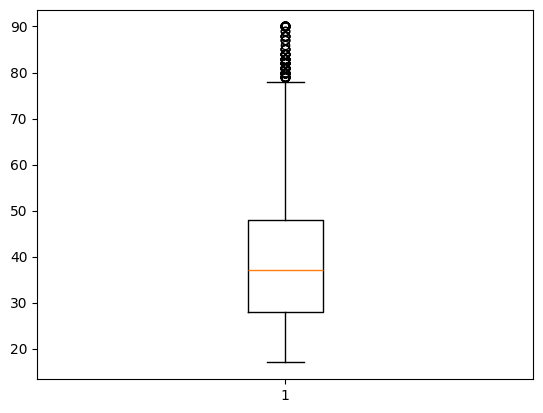

In [16]:
#outlier detection
#visualization
plt.boxplot(df['age'])
plt.show()

In [17]:
df=df[(df['age']<=75)&(df['age']>=17)]

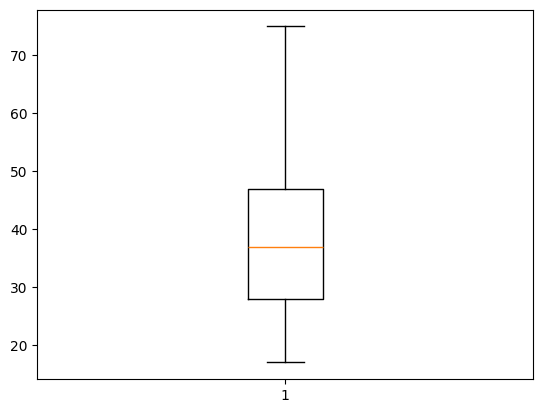

In [18]:
plt.boxplot(df['age'])
plt.show()

In [19]:
df.shape

(47619, 15)

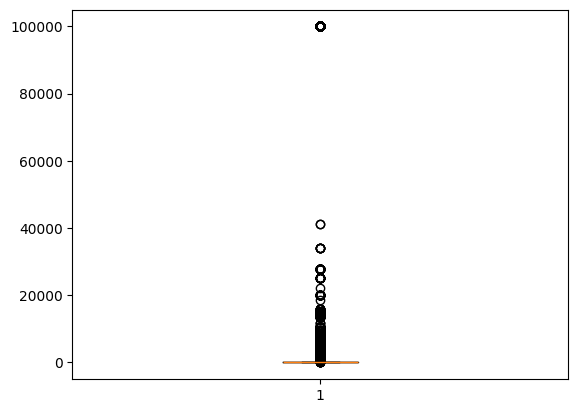

In [20]:
plt.boxplot(df['capital-gain'])
plt.show()

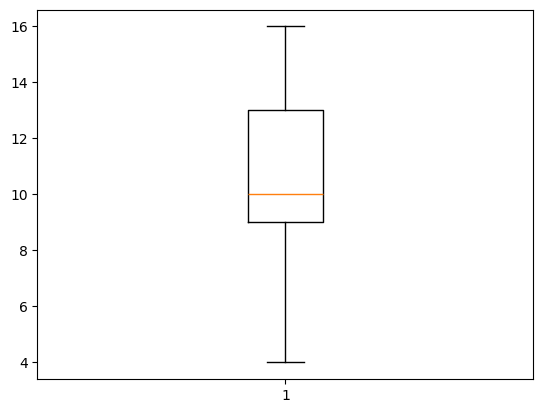

In [21]:
plt.boxplot(df['educational-num'])
plt.show()

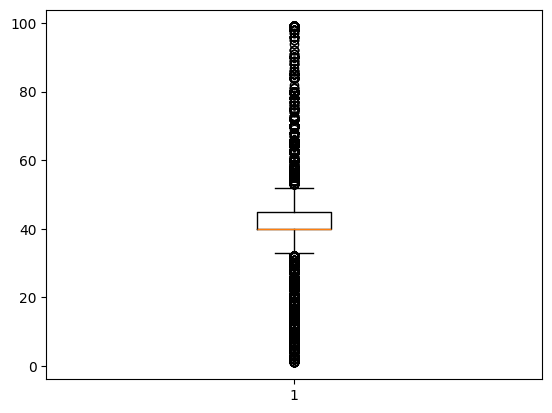

In [22]:
plt.boxplot(df['hours-per-week'])
plt.show()

In [23]:
df.shape

(47619, 15)

In [24]:
df=df.drop(columns=['educational-num','marital-status','fnlwgt','relationship','race']) #redundant feature


In [25]:
df

,age,workclass,education,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Machine-op-inspct,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Farming-fishing,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Protective-serv,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Machine-op-inspct,Male,7688,0,40,United-States,>50K
4,18,Others,Some-college,Others,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Tech-support,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,Machine-op-inspct,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,Adm-clerical,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,Adm-clerical,Male,0,0,20,United-States,<=50K


In [26]:
df.columns

Index(['age', 'workclass', 'education', 'occupation', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [27]:
df.describe()

,age,capital-gain,capital-loss,hours-per-week
count,47619.000000,47619.000000,47619.000000,47619.000000
mean,38.230664,1088.869191,87.912619,40.564733
std,13.199351,7495.382659,403.193640,12.304123
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,47.000000,0.000000,0.000000,45.000000
max,75.000000,99999.000000,4356.000000,99.000000


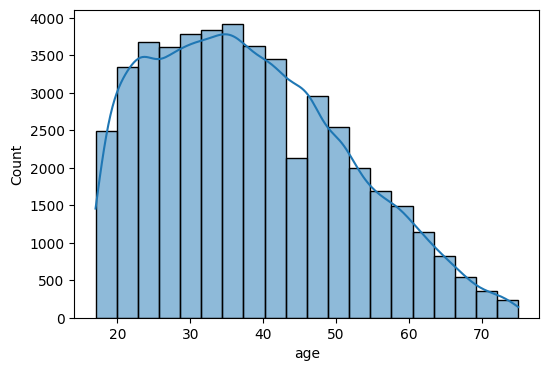

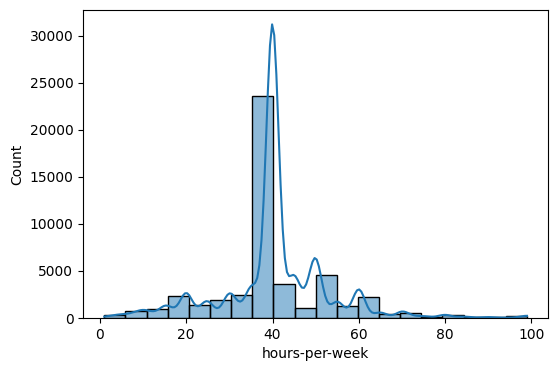

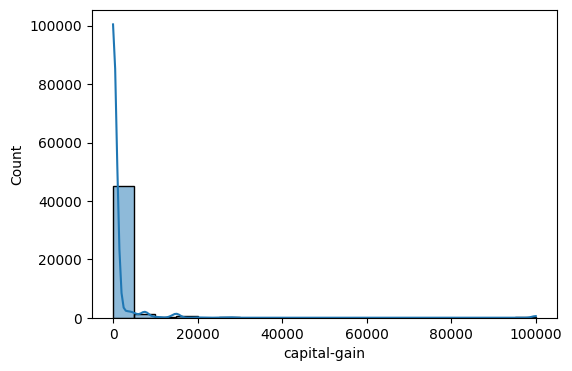

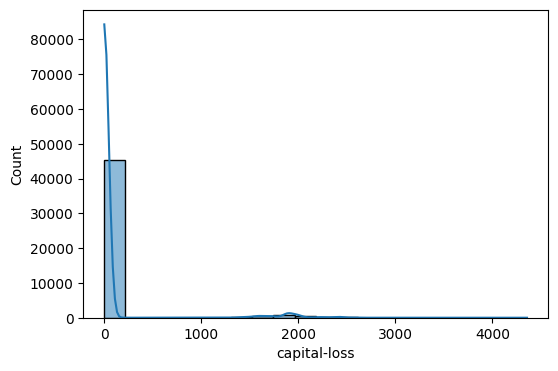

In [28]:
numeric_columns = ['age', 'hours-per-week','capital-gain','capital-loss']
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde = True, bins = 20) 

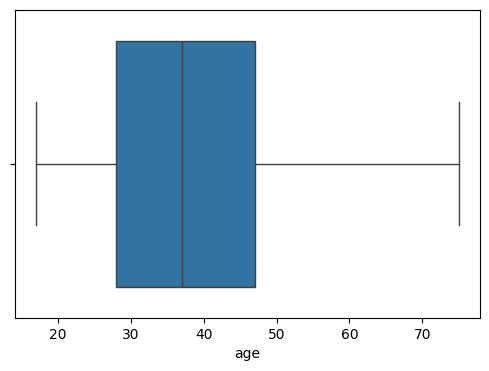

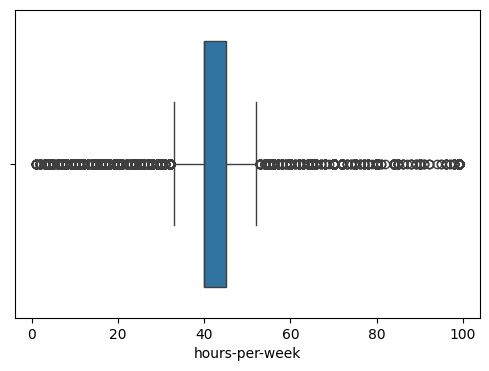

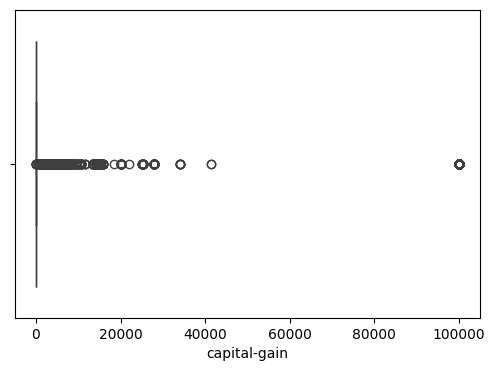

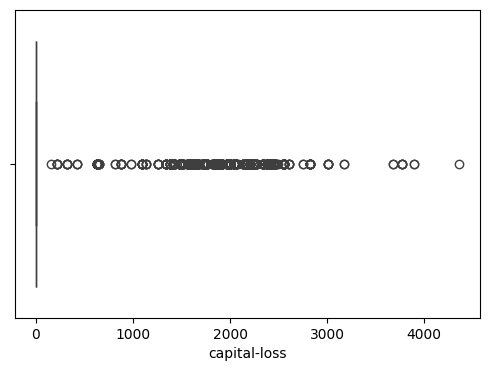

In [29]:
for col in numeric_columns: 
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])

In [30]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object

encoders = {}
for col in ['education', 'occupation','workclass','gender','native-country']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

    
# df['workclass']=encoder.fit_transform(df['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
# df['education']=encoder.fit_transform(df['education'])
# df['marital-status']=encoder.fit_transform(df['marital-status'])   #3 categories 0, 1, 2
# df['occupation']=encoder.fit_transform(df['occupation'])
# df['relationship']=encoder.fit_transform(df['relationship'])      #5 categories  0, 1, 2, 3, 4
# df['race']=encoder.fit_transform(df['race'])  
# df['gender']=encoder.fit_transform(df['gender'])    #2 catogories     0, 1
# df['native-country']=encoder.fit_transform(df['native-country'])

In [31]:
df

,age,workclass,education,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,1,6,1,0,0,40,39,<=50K
1,38,3,9,4,1,0,0,50,39,<=50K
2,28,1,5,11,1,0,0,40,39,>50K
3,44,3,12,6,1,7688,0,40,39,>50K
4,18,2,12,8,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,27,3,5,13,0,0,0,38,39,<=50K
48838,40,3,9,6,1,0,0,40,39,>50K
48839,58,3,9,0,0,0,0,40,39,<=50K
48840,22,3,9,0,1,0,0,20,39,<=50K


<Axes: >

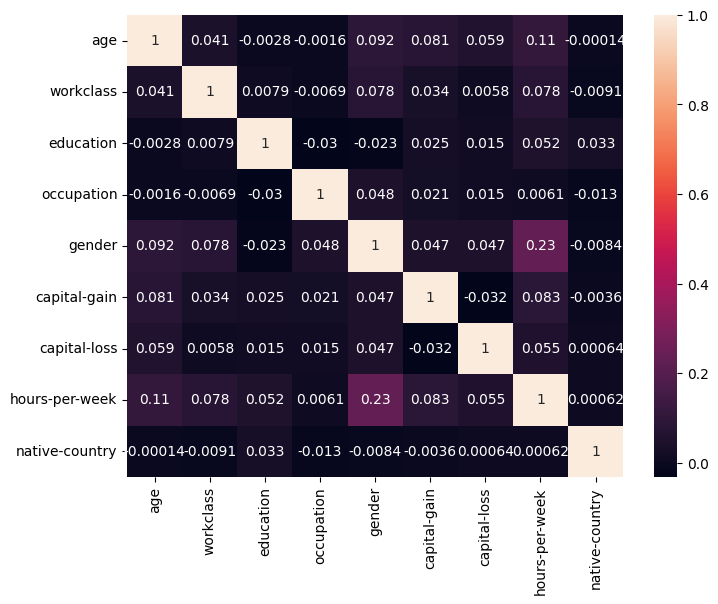

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [34]:
X=df.drop(columns=['income'])
y=df['income']

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Neural Network" : MLPClassifier(solver='adam', hidden_layer_sizes=(5,2), random_state=2, max_iter=2000),
    "KNN": KNeighborsClassifier(),
    "Naive Byeas" : GaussianNB(), 
    "Decision Tree" : DecisionTreeClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}




In [37]:
results = {}

In [38]:

for name, model in models.items():
    pipe = Pipeline([
        ('model', model)
    ])
    
    pipe.fit(X_train_scaled, y_train)
    y_pred = pipe.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")


LogisticRegression Accuracy: 0.8021
              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88      7277
        >50K       0.67      0.32      0.43      2247

    accuracy                           0.80      9524
   macro avg       0.74      0.63      0.66      9524
weighted avg       0.78      0.80      0.77      9524

RandomForest Accuracy: 0.8301
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      7277
        >50K       0.66      0.57      0.61      2247

    accuracy                           0.83      9524
   macro avg       0.77      0.74      0.75      9524
weighted avg       0.82      0.83      0.83      9524

Neural Network Accuracy: 0.8184
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7277
        >50K       0.69      0.43      0.53      2247

    accuracy                           0.82      9524
   macro avg       0.76      0

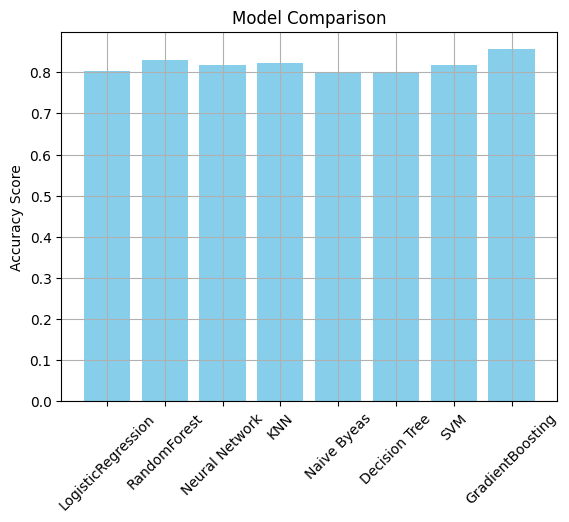

In [39]:

plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [40]:
import joblib
# Save the best model

joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler,"adult_scaler.pkl")
joblib.dump(X.columns.tolist(),"adult_columns.pkl")

# Save encoders
joblib.dump(encoders, 'adult_encoders.pkl')

print("✅ Saved best model as best_model.pkl")

✅ Saved best model as best_model.pkl
